# **Procesos Estocasticos I con Análisis Computacional**

*Escrito por: Manuel Montes y Morales*

Problemas para después:

https://codeforces.com/blog/entry/47423

<p align="justify"> Nota al lector:

<p align="justify"> Estas notas están pensadas para ser un complemento y recopilatorio de las técnicas vistas en el curso de procesos estocásticos I, sin embargo, el enfoque será mucho más concentrado en el ámbito computacional y de programación de los algoritmos, asumiendo la mayor parte de la teoría ha sido cubierta en el curso.

<p align="justify"> Aunado a ello, se integrarán algunos ejercicios pensados para programarse, en donde no sólo la teoría si no el modelado de problemas serán de importancia.

<p align="justify"> Sin más preambulo comencemos por explorar el comportamiento de un tipo de procesos estocásticos que cuentan con una propiedad en extremo útil, las cadenas de Markov.

---



$\textbf{Breve nota acerca de la complejidad de tiempo}$

<p align="justify"> En las secciones por venir iremos analizando la complejidad en tiempo de los algoritmos que vayamos desarrollando para el cálculo de probabilidades y propiedades en cadenas de Markov, por lo que es importante tomar en cuenta las operaciones que se tomarán en cuenta como básicas serán todas las de la aritmética elemental.

<p align="justify"> Como recordatorio, recuerde el análisis de complejidad toma un conjunto de operaciones como básicas para las cuales define su costo en tiempo como constante, $O(1)$. Es decir, nuestro análisis irá entorno a contar la magnitud de la cantidad de éstas operaciones que realiza nuestro algoritmo.

<p align="justify"> Sin embargo, observe suponer ciertas operaciones toman un tiempo constante podría ser engañoso ya que a veces éstas podrían tener un costo mucho más elevado en términos de otras. Por ejemplo, asumiremos la multiplicación de números reales toma $O(1)$, cuando en la práctica sabemos el algoritmo más eficiente de multiplicación tiene complejidad $O(n\log(n))$ donde $n$ es  la cantidad de dígitos del número y las operaciones básicas son la suma y la multiplicación de dígitos.

<p align="justify"> Por supuesto, la cantidad de dígitos podría llegar a ser relativamente pequeña durante todo el proceso y por tanto ser este costo despreciable. Pero en lo posterior tenemos que recordar trabajaremos con probabilidades, las cuales pueden rápidamente conventirse en números extremadamente pequeños al preguntarnos por probabilidades en tiempos relativamente cortos. Por lo tanto en lo subsecuente hay que considerar las complejidades corren el riesgo de en la práctica ser más lentas en un factor de $n\log(n)$.

---

# Indroducción a las Cadenas de Markov

<p align="justify"> Lo que nos interesa estudiar son cadenas de variables aleatorias $X_{0}, X_{1}, \cdots, X_{n}$, donde la pregunta fundamental es el predecir dada la historia de la cadena, con qué probabilidad podríamos observar un suceso para la variable aleatoria $X_{n+1}$. Sin embargo, esto puede volverse en extremo complicado de hacer ya que $X_{n+1}$ podría tener una fuerte dependencia con las variables previas, haciendo que expresar dicho entrelazamiento se nos haga inmanejable.

<p align="justify"> Note las cadenas de las cuales hablamos, tal como sugiere la notación ($X_{0}, X_{1}, \cdots, X_{n}$), son a tiempo discreto, es decir las variables aleatorias deben estar indexadas en el conjunto $T = \{0,1,2, \cdots\}$. Y además, para simplificar aún más el comportamiento, se supondrá las variables aleatorias comparten un espacio de estados discreto, $S \subset \mathbb{Z}$.

<p align="justify"> Es en esta problemática en donde las cadenas de Markov proponen una simplificación entre la dependencia de los eventos del pasado y el evento del presente, considerando cada evento de alguna manera ya encapsula toda la historia que lo llevó a suceder o que simplemente el evento del presente sólo depende de observar lo que sucedió en el instante inmediatamente previo. En ambos casos la propiedad de Markov asegura la probabilidad de observar un evento en el presente dada la historia será la misma que si sólo se condicionara con la información de la variable anterior. En notación:

<p align="center"> $P(X_{n+1} = y | X_{0} = x_{0}, X_{1} = x_{1}, \cdots, X_{n} = x_{n}) = P(X_{n+1} = y | X_{n} = x_{n})$

<p align="justify"> Donde $x_{0}, x_{1}, \cdots, x_{n}, y$ son realizaciones de sus variables aleatorias respectivamente y pertenecen a $S$.

<p align="justify"> Ahora bien, note que la fuerza de dicha propiedad es que si estamos en un estado $A$, entonces la probabilidad de transitar en el siguiente paso al estado $B$ será siempre la misma sin importar en que momento nos encontremos.

<p align="justify"> Esto significa podemos concentrarnos en averiguar todas las probabilidades de transición de un estado a otro $p(x,y)$, $x,y \in S$ y con ellas describir toda la dinámica de la cadena.

<p align="justify"> Sólo por comparación, note que si nuestro espacio de estados es $\{0,1,2\}$ entonces sólo será necesario que encontremos las $3^{2}$ parejas de posibles transiciones donde una pareja $(x,y)$ representa $P(X_{n+1} = y | X_{n} = x)$. Mientras que si no se cumpliera la propiedad de Markov entonces en general podríamos tener probabilidades de transición de longitud arbitraria, es decir $(0, 1, 1, 2)$ podría tener una probabilidad distinta de $(1,2)$ e incluso que $(1,0,1,2)$ a pesar es de la misma longitud y presenta los mismos estados sólo que en distinto orden.

<p align="justify"> Observe la representación en probabilidad condicional de éstas últimas es:

<p align="center"> $P(X_{3} = 2 | X_{0} = 0, X_{1} = 1, X_{2} = 1)$
<p align="center"> $P(X_{1} = 2 | X_{0} = 1)$
<p align="center"> $P(X_{3} = 2 | X_{0} = 1, X_{1} = 0, X_{2} = 1)$

<p align="justify"> respectivamente. Además, note no necesariamente nos será posible escribirlas en general como $P(X_{n + 3} = 2 | X_{n} = 0, X_{n+1} = 1, X_{n+2} = 1)$ ya que esto significaría el estado actual sólo depende de los tres previos pero de haber más historia podría ser dependiera de ésta igual.

<p align="justify"> Visualmente, la propiedad de Markov tiene que ver con un efecto recursivo o de fractal en el espacio medible. Donde la distribución inicial de los estados para la variable $X_{0}$ es arbitraria, pero una vez dentro de cualquier estado, la distribución de los estados (no necesariamente la inicial) se vuelve repetitiva.

<p align="justify"> De forma gráfica esto lo podemos representar como una partición del espacio en $n$ clases; donde $n$ es el número de estados y a cada uno se le asigna una medida arbitraria. Posterior a ello, cada una de las clases será nuevamente particionada en $n$ sub-clases, donde cada sub-clase tendrá la misma medida cada que parta a una clase proveniente del mismo estado. Y así se seguirá particionando, ahora tomado sub-sub-clases, recursivamente.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_1.jpeg?raw=true" width = 300/>
<figcaption>Ejemplo de una partición con tres pasos recursivos</figcaption></center>
</figure>

<p align="justify"> En la siguiente imagen simplificamos un poco la partición mostrada arriba y asignamos colores a cada clase para su mejor distinción. El espacio de estados es $T = \{0, 1, 2\}$ y se les asignan a cada uno los colores rojo, azul y verde, respectivamente.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_2.jpeg?raw=true" width = 300/>
<figcaption></figcaption></center>
</figure>

# Representación de una cadena de Markov

<p align="justify"> Como mencionábamos anteriormente, la propiedad de Markov ayuda enormente a simplificar la dinámica de una cadena, haciendo necesario solamente recordar las $n^{2}$ posibles transiciones entre los $n$ estados. Los cuales, por conveniencia, guardaremos por ahora en una matriz, aunque hasta el momento dicha matriz no será más que un contenedor para almacenarlas y accesarlas de forma eficiente.

<p align="justify"> A esta matriz le llamamos la matriz de transición de la cadena.

\begin{equation*}
P = \begin{pmatrix}
p(0,0) & p(0,1) & \cdots & p(0,n)\\
p(1,0) & p(1,1) & \cdots & p(1,n)\\
\vdots & \vdots & \cdots & \vdots\\
p(n,0) & p(n,1) & \cdots & p(n,n)
\end{pmatrix}
\end{equation*}

<p align="justify">  Nótese a pesar ya tenemos algo de información que describe a una cadena de Markov, nuestra visualización en el espacio de eventos no es muy conveniente a la hora de querer programarla ni a la hora de querer transitar en ella con fluidez.

<p align="justify">  Por ejemplo, si quisieramos describir eventos como lo podría ser $(X_{0}= 2, X_{1} = 2, X_{2} = 0)$ usando nuestra representación actual, la manera más sencilla de modelar la toma de decisiones en cada variable aleatoria, sería a partir de un árbol.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_3.jpeg?raw=true" width = 600/>
<figcaption></figcaption></center>
</figure>

<p align="justify"> En este caso, podemos observar el árbol que se generaría suponiendo $X_{0}= 2$. Una vez fija la raíz, los hijos de un nodo en el árbol simbolizan su partición en sub-clases, correspondientes a cada estado, donde cada arista está pesada con su respectiva probabilidad de transición $p(x,y)$. Además, note la profundidad $d$ de cada nivel del árbol simboliza las elecciones para la variable aleatoria $X_{d}$.

<p align="justify"> En este modelo de la cadena, podemos ahora ver representado al evento $(X_{0} = 2, X_{1} = 2, X_{2} = 0)$ como el camino en el árbol que satisface las tres condiciones.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_4.jpeg?raw=true" width = 600/>
<figcaption></figcaption></center>
</figure>

<p align="justify"> Volviendo a la visualización en el espacio de estados, dicho camino puede ser visto como el irse adentrando en sub-clases.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_5.jpeg?raw=true" width = 300/>
<figcaption></figcaption></center>
</figure>

<p align="justify"> Aquí hay algo importante a destacar sobre el modelo. Observe que los nodos no están representando el evento de estar en ellos en un cierto tiempo, es decir, el nodo con la etiqueta $0$ al que llegamos en la imagen anterior, no representa al evento $(X_{2} = 0)$ el cual se vería representado por los tres caminos que llevan al estado $0$ en la profundidad 2. En este diagrama cada nodo describe un evento conformado por una única elección de estados para cada variable aleatoria en el camino.

<p align="justify"> En otras palabras, los estados que se desprenden como hijos de distintos nodos están siendo reconocidos como esencialmente estados distintos. En la siguiente imagen podemos apreciar no es lo mismo estar en un estado 0 que en otro, a pesar también es el estado 0.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_6.jpeg?raw=true" width = 600/>
<figcaption></figcaption></center>
</figure>

<p align="justify"> Todo ello tiene sentido pues los estados 0 en verdad no estaban representando el mismo objeto, son pedazos de la partición diferentes. Sin embargo, nos preguntamos si no habrá una manera de aprovechar la repetición de estados y de probabilidades de transición para compactar el grafo.

<p align="justify"> Para ello nos aprovechamos fuertemente de la propiedad de Markov para poder condensar todo en un grafo dirigido con solamente $n$ nodos.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_11.jpeg?raw=true" width = 400/>
<figcaption></figcaption></center>
</figure>

<p align="justify"> Observe mientras transitamos el grafo vamos precisamente obteniendo la misma perspectiva que cuando alcanzábamos ese mismo estado en nuestro modelo anterior. Moverse en este grafo es igual a moverse en el árbol.

<p align="justify"> Ahora bien, explicaremos como implementar en Python un grafo dirigido, el cual en particular modelará por lo anterior descrito, una cadena de Markov.

<p align="justify"> Lo primero que haremos será crear una estructura de lo que será un nodo en nuestro grafo. ¿Para qué hacemos ésto? Bueno, esto lo hacemos porque queremos que cada nodo sea un objeto que guarde información sobre si mismo y que además pueda interactuar y ejecutar funciones (esto lo explicaremos a más adelante).

<p align="justify"> Antes de seguir, es importante destacar no es estrictamente necesario trabajar con objetos y podríamos emplear solamente la matriz de transiciones a lo cual se le conoce como representación de un grafo por su matriz de adyacencia, sin embargo, lo que implementaremos será su representación por listas de adyacencia.

<p align="justify"> En esta representación del grafo lo que se hace es que cada nodo sólo será conciente de aquellos nodos a los que sí puede transitar, en nuestro contexto, aquellos con los que tiene probabilidad de transición distinta de 0. La ventaja de ésta implementación la analizaremos con detalle en un ejemplo más adelante pero la idea es que no transitemos o consideremos caminos innecesarios.




<p align="justify"> La forma en que construiremos nuestro objeto de nodo será la siguiente:

<p align="justify"> Primero que nada, a cada nodo le asignaremos un ID o nombre, en nuestro contexto, el nombre o valor del estado que representa.

<p align="justify"> Después, le asignaremos un atributo correspondiente a su lista de hijos o dicho de otra forma, su lista de ID's de los nodos a los que puede transicionar (nótese sólo es el nombre de éstos y no la probabilidad que tiene de transicionar en ellos). Aunado a ésto, para fácil consulta, le agregaremos un atributo que cuente cuantos hijos tiene.

<p align="justify"> Finalmente, le añadiremos un método (el cual es una función el objeto será capaz de utilizar) que le permita añadir hijos a su lista y contarlos.

In [ ]:
class state():
    def __init__(self, name):
        self.name = name
        self.children = []
        self.n_children = 0

    def add_child(self, child):
        self.children.append(child)
        self.n_children += 1

<p align="justify"> Una vez tenemos nuestros objectos que actuarán como nodos, podemos pasar a hacer una función que cree el grafo para nuestra cadena de Markov. Para ello le daremos los siguientes valores:



1.   La cantidad de estados
2.   La distribución inicial para $X_{0}$
3. La matriz de transición

<p align="justify"> La manera en la que recibiremos la distribución inicial será con el siguiente formato, en una línea escribiremos las probabilidades $X_{0} = y$ donde $y \in T$ separadas por espacios.

<p align="justify"> Y para la matriz de transición usaremos el mismo formato para dar cada fila de la matriz.

<p align="justify"> En cuanto al código, note la variable states es una lista que guarda tantos objetos nodo como estados en nuestra cadena, asignándoles su nombre pero dejando sus listas de hijos vacías.

<p align="justify"> Posteriormente, cuando se recibe la matriz, si el valor en una entrada de la matriz es no negativo se añade el hijo al nodo que corresponde usando el método de nuestro objeto nodo para agregarse hijos.




In [ ]:
def initialize_chain():
    n_states = int(input("Da la cantidad de estados: "))
    states = [state(i) for i in range(n_states)]

    print("Da la distribucón inicial:")

    initial_dist = list(map(float, input().split()))

    print("Da la matriz de transicion:")

    transition_matrix = []

    for i in range(n_states):
        row = list(map(float, input().split()))
        transition_matrix.append(row)

        for j in range(n_states):
            if row[j] != 0:
                states[i].add_child(j)

    return n_states, states, initial_dist, transition_matrix

## Análisis de Complejidad

<p align="justify"> Debido a que recibiremos la matriz de transición, la cual tiene $n^{2}$ elementos, la complejidad Big O para la función initialize_chain() es $O(n^{2})$ y esto es algo a tenerse en cuenta para el análisis posterior ya que a pesar tengamos algoritmos quizás lineales para algunas tareas, globalmente no podremos bajar de hacer al menos $n^{2}$ operaciones.

<p align="justify"> Aquí cabe destacar nuestra implementación por listas de adjacencia de alguna forma intenta prevenir estemos recurriendo a checar $n^{2}$ posibles transiciones y nos limitemos a trabajar únicamente con lo necesario, es decir las aristas no triviales. En general esto lograría que los algoritmos que recorran el grafo estén en términos de $V$ la cantidad de aristas relevantes y nos de una sensación lineal con respecto a la densidad que hay en el grafo, aunque es posible $V = n^{2}$.

<p align="justify"> Sin embargo, posteriormente notaremos la utilidad adicional que trae consigo trabajar con la matriz de transición considerándola como tal una matriz y no sólo como un contenedor. Como veremos más adelante, la complejidad de cómputo de probabilidades no está cerca de ser lineal y por ello sacrificar un costo de inicialización de $n^{2}$ no nos perjudicará.

# Ejemplo de una Cadena de Markov

<p align="justify"> Veamos ahora un ejemplo de una cadena de Markov con tan sólo dos estados y usemos nuestro código para crear su grafo.



<p align="justify"> Supóngase en una fábrica se tiene una máquina que puede estar ya sea funcionando o descompuesta, cuyo estado se ha observado solamente depende de si funcionaba o no el día anterior. Actualmente la máquina está funcionando y la fábrica ha estimado la probabilidad siga funcionando si estaba funcionando es de 0.3, mientras que la probabilidad funcione tras haber estado descompuesta es de 0.4.

<p align="justify"> De esta situación nos es fácil encontrar el espacio de estados y la distribución inicial para la variable aleatoria $X_{0}$. Para el primero decidiremos modelarlo como $S = \{0, 1\}$; donde 0 representa descompuesta y 1 funcionando. Y para obtener la distribución inicial sólo hace falta notar nos dieron por seguro la máquina está en el estado 1 al tiempo 0, es decir $X_{0} = (0, 1)$ es la dist. inicial.

<p align="justify">Ahora bien, para hallar la matriz de transición nos apoyaremos de un hecho que no hemos destacado hasta ahora y es que la acumulación de las probabilidades de transicionar de un estado fijo a cualquier otro, debe dar 1. Note ésto tiene sentido ya que como dijimos antes, los estados particionan a cada estado. Analíticamente tenemos:

\begin{align*}
\sum_{y \in S} p(x,y) &=  \sum_{y \in S} P(X_{t+1} = y | X_{t} = x) \\
&= P(\bigcup_{y \in S}(\{X_{t+1} = y | X_{t} = x) \\
&= P(Ω | X_{t} = x) = 1
\end{align*}

<p align="justify"> De ello podemos inferir la probabilidad de funcionar se descomponga es 0.7 y de estar descompuesta seguirlo estando es 0.6.

\begin{equation*}
P = \begin{pmatrix}
0.6 & 0.4 \\
0.7 & 0.3
\end{pmatrix}
\end{equation*}

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_12.jpeg?raw=true" width = 450/>
<figcaption></figcaption>Grafo de la cadena del ejemplo de la máquina</center>
</figure>

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 2
Da la distribucón inicial:
0 1
Da la matriz de transicion:
0.6 0.4
0.7 0.3


<p align="justify"> Para visualizar la estructura del grafo creado, imprimiremos la información de los dos objetos nodos que hay en este caso.

In [ ]:
def print_information_states(states):
    for node in states:
      print("Estado: ", node.name)
      print("Puede transicionar a ", node.n_children, "estados: ", node.children)
    return

In [ ]:
print_information_states(states)

Estado:  0
Puede transicionar a  2 estados:  [0, 1]
Estado:  1
Puede transicionar a  2 estados:  [0, 1]


<p align="justify"> Como otro ejemplo en el que el grafo no sea tan simple, podemos tomar el siguiente, en el cual diremos su dist. inicial es $X_{0} = (0, 0, 0, 0, 0.5, 0, 0, 0, 0.5)$:

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_13.jpeg?raw=true" width = 450/>
<figcaption></figcaption>Grafo de una cadena de Markov</center>
</figure>

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 9
Da la distribucón inicial:
0 0 0 0 0.5 0 0 0 0.5
Da la matriz de transicion:
0 1 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
0.25 0 0.25 0 0 0 0.25 0.25 0
0 0 0 0.4 0 0 0.3 0.3 0
0 0 0 0 0 0.4 0 0.3 0.3
0 0 0 0 0.5 0.5 0 0 0
0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 1 0
0 0 0 0 1 0 0 0 0


In [ ]:
print_information_states(states)

Estado:  0
Puede transicionar a  1 estados:  [1]
Estado:  1
Puede transicionar a  1 estados:  [0]
Estado:  2
Puede transicionar a  4 estados:  [0, 2, 6, 7]
Estado:  3
Puede transicionar a  3 estados:  [3, 6, 7]
Estado:  4
Puede transicionar a  3 estados:  [5, 7, 8]
Estado:  5
Puede transicionar a  2 estados:  [4, 5]
Estado:  6
Puede transicionar a  1 estados:  [6]
Estado:  7
Puede transicionar a  1 estados:  [7]
Estado:  8
Puede transicionar a  1 estados:  [4]


# Calculando Probabilidades de Eventos

<p align="justify"> Ahora que hemos entendido mejor la estructura y modelo para una cadena de Markov, estamos listos para preguntarnos por nuestra tarea principal, la probabilidad de eventos.

<p align="justify"> Por ejemplo, ¿cuál sería la probabilidad del evento $(X_{0} = x_{0}, X_{1} = x_{1})$?

<p align="justify"> Para responder a esa pregunta, será mejor observar un caso particular para el cual supondremos el espacio de estados es $S = \{0, 1, 2\}$. Gráficamente, ¿Cómo observaríamos al evento $(X_{0} = 2, X_{1} = 0)$?

<p align="justify"> Recuérdese nuestro modelo ya no es un árbol sino un grafo dirigido en general. Sin embargo, podemos observar las distintas elecciones para las variables aleatorias ordenándolas por profundidad y mostrando las distintas conexiones disponibles de cada nodo. Básicamente estamos elaborando un grafo que nos facilite observar caminos en nuestro grafo de la cadena. A continuación se ilustra este grafo para nuestra cadena con tres estados y hasta el tiempo 3.


<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_14.jpeg?raw=true" width = 450/>
<figcaption></figcaption>Grafo de los caminos en una cadena de Markov</center>
</figure>

<p align="justify"> Es en este grafo que podemos ver representado a nuestro evento.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_15.jpeg?raw=true" width = 400/>
<figcaption></figcaption>Evento $(X_{0} = x_{0}, X_{1} = x_{1})$</center>
</figure>

<p align="justify"> A través de este diagrama es que pensamos la probabilidad del evento debería ser la probabilidad $X_{0} = 2$ multiplicado por la probabilidad de transicionar del estado 2 al 0.

<p align="justify"> Algebráicamente, denotando por $Π_{0}$ al vector de la distribución de la variable $X_{0}$, $Π_{0} = (P(X_{0} = 0), P(X_{0} = 1), \cdots)$, tenemos:

\begin{align*}
P(X_{0} = x_{0}, X_{1} = x_{1}) &= P(X_{0} = x_{0}) * P(X_{1} = x_{1} | X_{0} = x_{0}) \\
&= Π_{0}(x_{0})*p(x_{0}, x_{1})
\end{align*}

<p align="justify"> Para el caso de un evento donde las tres primeras variables aleatorias son fijas $(X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2})$ podemos proceder de la misma manera. Tómese por ejemplo el evento particular $(X_{0} = 2, X_{1} = 0, X_{2} = 2)$:

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_16.jpeg?raw=true" width = 400/>
<figcaption></figcaption>Evento $(X_{0} = 2, X_{1} = 0, X_{2} = 2)$</center>
</figure>

<p align="justify"> Algebráicamente:

\begin{align*}
P(X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}) &= P(X_{0} = x_{0}, X_{1} = x_{1}) * P(X_{2} = x_{2} | X_{0} = x_{0}, X_{1} = x_{1}) \\
&= P(X_{0} = x_{0}, X_{1} = x_{1}) * P(X_{2} = x_{2} | X_{1} = x_{1}) \\
&= Π_{0}(x_{0})*p(x_{0}, x_{1})*p(x_{1}, x_{2})
\end{align*}

<p align="justify"> Y en general, si tenemos un evento descrito por la elección para las primeras $n$ variables aleatorias, tenemos:

\begin{equation*}
P(X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}) = Π_{0}(x_{0})*p(x_{0}, x_{1})*p(x_{1}, x_{2})* \cdots * p(x_{n-1}, x_{n})
\end{equation*}

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_17.jpeg?raw=true" width = 400/>
<figcaption></figcaption> Evento $(X_{0} = 2, X_{1} = 0, X_{2} = 2, X_{3} = 1, X_{4} = 1, X_{5} = 0)$</center>
</figure>

<p align="justify"> Pero, ¿qué pasa si no se fija el valor de cada variable aleatoria intermedia? Por ejemplo, ¿cuál es la probabilidad del evento $(X_{0} = 2, X_{2} = 1)$?

<p align="justify"> En este caso, parecería se tiene total desinformación sobre el valor de la variable $X_{1}$, sin embargo lo que el evento $(X_{0} = 2, X_{2} = 1)$ representa es la unión de todos los eventos, con $X_{1}$ fijo que cumplen comienzan en el estado 2 y llevan al estado 1.

\begin{align*}
(X_{0} = x_{0}, X_{2} = x_{2}) &= (X_{0} = x_{0}, ⋃_{x_{1} \in S} \{X_{1} = x_{1}\}, X_{2} = x_{2})\\
&= ⋃_{x_{1} \in S} (X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2})
\end{align*}

<p align="justify"> Visualmente, esto lo podemos observar como todos los posibles caminos que inician en el estado 2 en la profundidad 0 y llevan al estado 1 en la profundidad 2. Calcular la probabilidad del evento entonces parece se convierte en la suma de las probabilidades de haber elegido cualquiera de los caminos. Note esto tiene sentido, y se verá en la demostración algebraica, ya que esencialmente partimos el evento en un conjunto de eventos disjuntos y contable, lo cual nos permite reconstruir la probabilidad a partir de su suma.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_8.jpeg?raw=true" width = 400/>
<figcaption></figcaption> Evento $(X_{0} = 2, X_{2} = 1)$</center>
</figure>

<p align="justify"> Algebráicamente esto lo podemos comprobar:

\begin{align*}
P(X_{0} = x_{0}, X_{2} = x_{2}) &= P(X_{0} = x_{0}, ⋃_{x_{1} \in S} \{X_{1} = x_{1}\}, X_{2} = x_{2})\\
&= P(⋃_{x_{1} \in S} (X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}))
\end{align*}

<p align="justify"> Pero ya que es la unión contable de eventos disjuntos (al ser $S$ contable), tenemos:

\begin{align*}
P(⋃_{x_{1} \in S} (X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2})) &= ∑_{x_{1} \in S} P((X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2})) \\
&= ∑_{x_{1} \in S} Π_{0}(x_{0}) * p(x_{0}, x_{1}) * p(x_{1}, x_{2})
\end{align*}

<p align="justify"> Si ahora aumentamos la cantidad de variables no fijas, podemos ver la misma idea se generaliza, con la excepción ahora los caminos se subdividen en más y más ramas, de forma exponencial, ya que para cada variable no fija hay $n$ posibles transiciones. En la próxima imagen se muestra el evento $(X_{0} = 2, X_{3} = 1)$, cuya probabilidad será de nuevo la suma de la probabilidad de haber tomado cada camino.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_9.jpeg?raw=true" width = 400/>
<figcaption></figcaption> Evento $(X_{0} = 2, X_{3} = 1)$</center>
</figure>

<p align="justify"> Algebraicamente podemos expandir la misma demostración que antes:

\begin{align*}
P(X_{0} = x_{0}, X_{3} = x_{3}) &= P(X_{0} = x_{0}, ⋃_{x_{1} \in S} \{X_{1} = x_{1}\}, ⋃_{x_{2} \in S} \{X_{2} = x_{2}\}, X_{3} = x_{3})\\
&= P(⋃_{x_{1} \in S} ⋃_{x_{2} \in S} (X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}, X_{3} = x_{3}))
\end{align*}

<p align="justify"> Pero ya que es la unión contable de eventos disjuntos (al ser $S$ contable), tenemos:

\begin{align*}
P(⋃_{x_{1} \in S} ⋃_{x_{2} \in S} (X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}, X_{3} = x_{3})) &= ∑_{x_{1} \in S} ∑_{x_{2} \in S} P((X_{0} = x_{0}, X_{1} = x_{1}, X_{2} = x_{2}, X_{3} = x_{3})) \\
&= ∑_{x_{1} \in S} ∑_{x_{2} \in S} Π_{0}(x_{0}) * p(x_{0}, x_{1}) * p(x_{1}, x_{2}) * p(x_{2}, x_{3})
\end{align*}

<p align="justify"> Finalmente, sólo resta un último caso por examinar. ¿Cuál es la probabilidad de un evento de la forma $(X_{0} = x_{0}, X_{3} = x_{3}, X_{5} = x_{5})$? Sin embargo dicho evento ya no debería representar una dificultad ya que es una extensión directa de lo que hemos desarrollado hasta ahora. Debajo dejamos el resultado y se deja su verificación al lector.

\begin{align*}
P(X_{0} = x_{0}, X_{3} = x_{3}, X_{5} = x_{5}) = ∑_{x_{1} \in S} ∑_{x_{2} \in S} ∑_{x_{4} \in S} Π_{0}(x_{0}) * p(x_{0}, x_{1}) * p(x_{1}, x_{2}) * p(x_{2}, x_{3}) * p(x_{3}, x_{4})* p(x_{4}, x_{5})
\end{align*}

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_10.jpeg?raw=true" width = 400/>
<figcaption></figcaption> Evento $(X_{0} = 2, X_{3} = 0, X_{5}= 1)$</center>
</figure>

# Primer Algoritmo para el Cálculo de Probabilidades de Eventos

<p align="justify"> Ahora que sabemos como calcular probabilidades de eventos, pasemos a desarrollar un algoritmo que sea capaz de calcularlas dada la información del evento. Para ello, debemos hacer un algoritmo que dado un grafo y los valores fijos del evento, realice todos los posibles caminos que cumplan las restricciones, saque sus probabilidades y finalmente las sume para obtener la probabilidad del evento.

<p align="justify"> La idea que usaremos para generar todos los posibles caminos será la de una pila, en la cual se irán produciendo los caminos uno a uno y cuando se alcance la última posición fija se calculará su probabilidad.

<p align="justify"> La razón por la cual usaremos una pila como estructura de datos, es porque tal como lo indica su nombre los datos se apilan uno sobre otro y tal como en una pila de platos, el último en ingresar es el único que puede ser removido. Abajo se muestra como se vería la generación de caminos en un grafo usando una pila.

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_18.jpeg?raw=true" width = 800/>
<figcaption></figcaption></center>
</figure>

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_19.jpeg?raw=true" width = 800/>
<figcaption></figcaption></center>
</figure>

<figure>
<center>
<img src="https://github.com/ManuelMontesyMorales/Servicio-Social/blob/main/Image_20.jpeg?raw=true" width = 800/>
<figcaption></figcaption>Generación de caminos por medio de una pila</center>
</figure>

<p align="justify"> Como se puede apreciar de las imágenes, se ingresa un nodo y se prosigue a ingresar alguno de sus hijos que no haya sido ya ingresado antes por él. Luego se repite el proceso para el nuevo nodo ingresado y así sucesivamente hasta que algún nodo ya no cuente con hijos. Entonces, este último nodo será removido de la pila y se ingresará el siguiente hijo del nuevo último nodo de la pila y así se continua hasta que todos los nodos se remueven. Finalmente se garantiza una vez se hayan removido todos los nodos, todos los caminos que podían ser empezados por alguno de los nodos ingresados cuando la pila está vacía han sido recorridos. Por ejemplo, en el grafo que se usó en la imagen garantizaríamos al finalizar el proceso haber generado todos los caminos que empiezan con el nodo 0.

<p align="justify"> Ahora bien, en nuestro problema no generaremos todos los caminos a ciegas y luego comprobaremos si satisfacen las restricciones, sino que querremos ir construyendo un camino válido mientras vamos. Para ello haremos un arreglo que nos indique si el valor para la variable aleatoria del tiempo $t$ es libre de elegirse, en cuyo caso pondremos el valor -1, o si está fijo en cuyo caso pondremos en que valor.

<p align="justify"> Por ejemplo para el evento $(X_{0} = 2, X_{3} = 0, X_{5} = 1)$, el arreglo, al que llamaremos $\textit{event}$, sería:

\begin{equation*}
\text{event} = [2, -1, -1, 0, -1, 1]
\end{equation*}

<p align="justify"> Respecto a como se ingresarán estos datos al programa, primero deberemos decir la cantidad de variables fijas que habrá en el evento para posteriormente dar cada una de ellas, una por línea, escribiendo el tiempo de la variable y el valor fijo que tiene.

<p align="justify"> Una vez obtenido este arreglo, lo usaremos como guía para contrastar el camino que se vaya generando por medio de la pila y asegurarnos los valores fijos coincidan y en caso contrario no meter ese elemento en la pila y continuar el proceso, hasta que la pila tenga longitud igual al índice de la última variable con valor fijo, en cuyo caso podemos pasar a calcular la probabilidad. A este valor de la longitud objetivo le llamaremos $\textit{lenght}$.

<p align="justify"> Todo este proceso será realizado por la función que llamaremos $\textit{calculate_event}$ la cual llamará posteriormente a la función $\textit{calculate_rooted_event}$ para hacer el algoritmo con la pila de la generación de caminos.

<p align="justify"> Antes de continuar es importante mencionar a la función $\textit{calculate_rooted_event}$ no le pusimos ese nombre por casualidad, la razón por la que le llamamos así es porque los únicos eventos de los cuales generaremos sus caminos es de aquellos que tengan fijo el valor para $X_{0}$, esto porque nos da un punto de partida y echa a andar el proceso. Sin embargo, bien podría ser el evento que queremos no fije el valor para $X_{0}$, en este caso deberemos elaborar todos los caminos partiendo desde cualquier estado y al final sumar los resultados para cada uno de esos eventos que ahora sí tienen un valor fijo pra $X_{0}$.

<p align="justify"> Por ejemplo, en el caso del evento $(X_{3} = 2)$; donde tomaremos $S = \{0, 1, 2\}$, los eventos enraízados (o en otras palabras que fijan el primer valor) serían:

\begin{equation*}
(X_{0} = 0, X_{3} = 2) \text{ ,} (X_{0} = 1, X_{3} = 2) \text{ ,} (X_{0} = 2, X_{3} = 2)
\end{equation*}

<p align="justify"> Este proceso también se llevará acabo dentro de la función $\textit{calculate_event}$.

<p align="justify"> Ahora bien, pasando a lo que hará la función $\textit{calculate_rooted_event}$, haremos un pequeño ajuste de implementación a el tipo de objetos se irán ingresando a la pila, a la cual llamaremos en el código $\textit{path}$.

<p align="justify"> Como mencionamos anteriormente, cuando ingresemos al último nodo actual en la pila, procederemos a ingresar uno de sus hijos que no haya sido ingresado previamente por él. Esto es sencillo de describir, pero en el código, al observar al último nodo en la pila deberemos saber cuales de sus hijos ya fueron ingresados y cuales faltan por ingresar. Para poder saber esta información nos aprovecharemos cada objeto nodo ya tiene su lista de adyacencia, la cual tiene un orden dado naturalmente por sus índices en dicha lista. Por lo tanto, decidiremos guardar en la pila no nodos sino parejas conformadas de un nodo y el índice de su último hijo que ingresó, el cual será inicialmente puesto en el índice 0.

<p align="justify"> De esta manera, si al observar el último elemento en la pila vemos el índice de su último hijo ingresado es igual a la cantidad de hijos que tiene, sabremos ya los ha ingresado todos y debemos removerlo de la pila. (Note los índices están recorridos uno hacia atrás pues comienzan en 0, es por esto que la igualdad descrita nos indica hemos pasado el último índice disponible).

<p align="justify"> Aunado a esto, cada que queramos ingresar una nueva pareja a la pila, compararemos si la restricción impuesta en el evento, la cual podremos ver en el arreglo $\textit{event}$, permite dicha elección, en caso no, continuaremos con el próximo hijo.

<p align="justify"> Finalmente, si se ingresa una pareja que hace la pila tenga la misma longitud que la variable $\textit{lenght}$, entonces sabremos tenemos un camino válido completo y procederemos a evaluar su probabilidad con la función $\textit{path_prob}$.

<p align="justify"> La función $\textit{path_prob}$ recibirá el arreglo correspondiente a la pila una vez ésta tenga un camino completo, es decir, un evento donde todas las variables aleatorias necesarias tienen ya una realización en particular.

<p align="justify"> Es en esta función en donde será necesario tener la distribución inicial y la matriz de transición de la cadena, para así poder calcular la probabilidad del camino como ya hemos visto antes para eventos completamente descritos.

\begin{equation*}
Π_{0}(x_{0}) * p(x_{0}, x_{1})* p(x_{1}, x_{2}) * \cdots * p(x_{lenght -2}, x_{lenght -1})
\end{equation*}

<p align="justify"> Una vez hecha esta cuenta, será regresada y sumada a la probabilidad total del evento deseado.

<p align="justify"> A continuación está el código para cada una de las funciones descritas, en las que cada una tiene comentarios extra para una mejor lectura.

In [ ]:
def path_prob(path, lenght, initial_dist, transition_matrix):
    prob = initial_dist[path[0][0]]

    for i in range(lenght -1):
        initial_state = path[i][0]
        end_state = path[i+1][0]

        prob *= transition_matrix[initial_state][end_state]

    return prob

def calculate_rooted_event(event, event_lenght, states, initial_dist, transition_matrix):
    #la variable prob irá acumulando las probabilidades para cada camino
    #finalmente ésta variable debrá tener la probabilidad para el evento enraizado
    prob = 0
    root = [event[0], 0]
    path = [root]

    #path_lenght irá teniendo la longitud del camino actual
    path_lenght = 1

    #Note si la longitud del camino actual es 0 significa todos los elementos
    #de la pila han sido removidos, por lo que hemos terminado y la variable prob
    #ya tiene su valor deseado
    while path_lenght != 0:
        #Si ya se tiene un camino de la longitud deseada del evento
        #entonces pasamos a calcular su probabilidad
        if path_lenght == event_lenght:
            prob += path_prob(path, path_lenght, initial_dist, transition_matrix)
            #trash es una variable para remover el último elemento de la pila
            trash = path.pop()
            #Actualizamos la longitud pues ya se removió un elemento
            path_lenght -= 1
            continue

        #parent tendrá al objeto nodo en la última posición de la pila
        #mientras que current_child tendrá el índice de su último hijo
        #sin ingresar
        parent = states[path[-1][0]]
        current_child = path[-1][1]

        #Este condicional checa el índice sea el de un hijo existente
        #es decir, que no se los haya ya terminado
        if current_child < parent.n_children:
            #child guarda a su nodo hijo
            child = parent.children[current_child]

            #Se checa el valor del hijo coincida con la del estado fijo
            #si es que este está fijo para esa variable aleatoria del evento
            if event[path_lenght] == -1 or event[path_lenght] == child:
                #Se modifica el índice del último hijo del padre ingresado
                #y se agrega al hijo a la pila
                path[-1][1] += 1
                path.append([child, 0])
                path_lenght += 1
            else:
                #De lo contrario se aumenta el índice del último hijo solamente
                path[-1][1] += 1

        else:
            #Si ya se terminó sus hijos es removido de la pila
            trash = path.pop()
            path_lenght -= 1

    return prob


def calculate_event(n_states, states, initial_dist, transition_matrix):
    n_fixed_positions = int(input("Da la cantidad de posiciones fijas: "))
    fixed_positions = []

    print("Da las posiciones fijas:")

    for i in range(n_fixed_positions):
        fixed_position = list(map(int, input().split()))
        fixed_positions.append(fixed_position)

    lenght = fixed_positions[-1][0] +1

    event = [-1 for i in range(lenght)]

    #Se modifica el arreglo event para que tenga los valores fijos
    for element in fixed_positions:
        index = element[0]
        realization = element[1]
        event[index] = realization

    #Esta variable prob acumulará el valor de la probabilidad del evento
    #(no necesariamente enraizado) deseado
    prob = 0

    #Si la variable aleatoria X_0 no está fija entonces se enraizan eventos
    #con todos sus posibles valores
    if event[0] == -1:
        for i in range(n_states):
            event[0] = i
            prob += calculate_rooted_event(event, lenght, states, initial_dist, transition_matrix)

    #De lo contrario el evento ya estaba enraizado y puede ser calculada su
    #probabilidad directamente
    else:
        prob = calculate_rooted_event(event, lenght, states, initial_dist, transition_matrix)

    return prob

<p align="justify"> Damos ahora una cadena de ejemplo en la que calcularemos la probabilidad para algunos eventos.

<p align="justify"> Sea $S = \{0, 1, 2\}$ el espacio de eventos, $Π_{0} = (0.2, 0.5, 0.3)$ su distribución inicial y:

\begin{equation*}
P = \begin{pmatrix}
0 & 0.3 & 0.7\\
0 & 0 & 1\\
0.6 & 0.4 & 0
\end{pmatrix}
\end{equation*}

<p align="justify"> su matriz de transición.

<p align="justify"> Nos preguntaremos las probabilidades de los eventos $(X_{0} = 0, X_{2} = 1)$ y $(X_{2} = 1)$.

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 3
Da la distribucón inicial:
0.2 0.5 0.3
Da la matriz de transicion:
0 0.3 0.7
0 0 1
0.6 0.4 0


In [ ]:
prob_event = calculate_event(n_states, states, initial_dist, transition_matrix)

print("La probabilidad del evento es: ", prob_event)

Da la cantidad de posiciones fijas: 2
Da las posiciones fijas:
0 0
2 1
La probabilidad del evento es:  0.055999999999999994


In [ ]:
prob_event = calculate_event(n_states, states, initial_dist, transition_matrix)

print("La probabilidad del evento es: ", prob_event)

Da la cantidad de posiciones fijas: 1
Da las posiciones fijas:
2 1
La probabilidad del evento es:  0.31


<p align="justify"> Los cuales si se desarrollan a mano se puede verificar son correctos.

## Análisis de complejidad

<p align="justify"> Para el análisis, note que el tiempo que tarda en correr la función calculate_event() estará dominada por el número de eventos a calcular su probabilidad. Si $T$ es el último tiempo que tiene un valor fijo y $m$ es el número de tiempos desde 0 hasta $T$ que no están fijos, entonces tendremos que calcular la probabilidad para $n^{m}$ eventos, donde $n$ es el número de estados.

<p align="justify"> Note que estamos sobreestimando el número de eventos a calcular, ya que no todas las elecciones para las variables no fijas son válidas ni todos los nodos tienen $n$ hijos. Dicho eso, tenemos la complejidad de la función es $O(n^{m}*T)$ debido a que cada evento completo se calcula linealmente respecto a su longitud que es $T$.

<p align="justify"> Aquí podemos hacer una comparación de que tanto beneficio nos da trabajar con una representación por listas de adjacencia en vez de considerar ciegamente $n$ hijos para cada nodo. Suponga por ejemplo que tenemos el siguiente grafo:

<figure>
<center>
<img src="https://drive.google.com/uc?id=1pGCG7pw0vF8Y0IM1Utx-abj_RhYIUnUn" width = 250/>
<figcaption></figcaption>Ejemplo Grafo</center>
</figure>


<p align="justify"> En él podemos observar cada nodo tendrá solamente dos hijos, por lo tanto si quisiéramos calcular la probabilidad de un evento en el que las posiciones no fijas son $m$ y la longitud es $T$, esto nos tomaría $2^{m}$. Por otra parte, si consideráramos 8 posibles hijos tendríamos nos tomaría $8^{m} = 2^{3m}$, lo cual es una diferencia significativa a la hora de lidiar con valores grandes. Esto nos lleva al siguiente inconveniente y es que crecimientos exponenciales no ocupan valores muy grandes para convertirse en cantidades realmente mountruosas.

<p align="justify"> Por culpa de esta complejidad a la hora de realizar cálculos de probabilidades es que buscamos otra manera que esquive tener que estar constantemente considerando el desglose de todos los posibles caminos, lo cual nos llevo precisamente a una expresión del tipo $x^{y}$.

# Probabilidad de Transición en n-Pasos

<p align="justify"> Para lidiar con esta problemática, nos damos cuenta el crecimiento exponencial nace del hecho cuando tenemos saltos grandes entre dos tiempos fijos, necesitamos calcular un número exponencial de posibles caminos para posteriormente transitar cada uno. Sin embargo, cuando los tiempos fijos eran consecutivos, nos era inmediato calcular la probabilidad hasta ese punto y propagar un único camino. Nos preguntamos entonces si será posible obtener un probabilidad de transición que nos ayude a brincar largas distancias en el tiempo de un sólo golpe. En otras palabras, nos estamos preguntando por transiciones entre estados $a$ y $b \in S$ en $n$ pasos.

<p align="justify"> Calculemos ahora la probabilidad en 2 pasos de $a$ a $b$, donde $S$ es finito, y veamos si su forma nos motiva a una manera de calcularlas eficientemente. Tenemos:

\begin{align*}
P(X_{0} = a, X_{2} = b) &= P(X_{0} = a, ⋃_{y \in S} \{X_{1} = y\}, X_{2} = b)\\
&= P(⋃_{y \in S} ( X_{0} = a, X_{1} = y, X_{2} = b))\\
&=Σ_{y \in S} P(X_{0} = a, X_{1} = y, X_{2} = b)\\
&= p(a,y_{1})*p(y_{1},b) + p(a,y_{2})*p(y_{2},b) + ⋯ + p(a,y_{n})*p(y_{n},b)\\
& \\
&= \begin{bmatrix}
    p(a, y_{1}) & p(a, y_{2}) & \cdots & p(a, y_{n})\end{bmatrix}\begin{bmatrix} p(y_{1},b) \\ p(y_{2}, b) \\ \vdots \\ p(y_{n}, b) \end{bmatrix}
\end{align*}

<p align="justify"> Note que a partir de esta última expresión es sugerente lo que estamos haciendo es de alguna manera repesar las transiciones. Es de aquí que se nos ocurre no sólo calcular el cambio de peso para una transición y en vez de ello pasar a repesar todas en conjunto a través de una multiplicación de matrices. A continuación se muestra el cálculo del cual se obtiene la matriz de transiciones en 2 pasos para la matriz específica que se trató en el ejemplo de la máquina. Observe cada entrada de la matriz obtenida es la nueva probabilidad de transición entre dos estados pero esta vez considerando pudo haber ido a cualquier otro estado en el paso intermedio. Debajo mostramos la cuenta para cada una de estas probabilidades de forma individual como lo hacíamos antes, de lo cual el lector puede confirmar en verdad la matriz tiene los valores buscados.

\begin{equation*}
\begin{bmatrix}
    0.6 & 0.4\\
    0.7 & 0.3
\end{bmatrix}
\begin{bmatrix}
    0.6 & 0.4\\
    0.7 & 0.3
\end{bmatrix} =
\begin{bmatrix}
    0.64 & 0.36\\
    0.63 & 0.37
\end{bmatrix}
\end{equation*}

\\

\begin{align*}
P(X_{0} = 0, X_{2} = 0) &= P(X_{0} = 0, X_{1} = 0, X_{2} = 0) + P(X_{0} = 0, X_{1} = 1, X_{2} = 0) = 0.6*0.6 + 0.4*0.7 = 0.64\\
\\
P(X_{0} = 0, X_{2} = 1) &= P(X_{0} = 0, X_{1} = 0, X_{2} = 1) + P(X_{0} = 0, X_{1} = 1, X_{2} = 1) = 0.6*0.4 + 0.4*0.3 = 0.36\\
\\
P(X_{0} = 1, X_{2} = 0) &= P(X_{0} = 1, X_{1} = 0, X_{2} = 0) + P(X_{0} = 1, X_{1} = 1, X_{2} = 0) = 0.7*0.6 + 0.3*0.7 = 0.63\\
\\
P(X_{0} = 1, X_{2} = 1) &= P(X_{0} = 1, X_{1} = 0, X_{2} = 1) + P(X_{0} = 1, X_{1} = 1, X_{2} = 1) = 0.7*0.4 + 0.3*0.3 = 0.37
\end{align*}


<p align="justify"> Ahora bien, qué es exactamente lo que estamos representando a través de la multiplicación de matrices? Note si interpretamos las columnas de la matriz como vectores, éstos representan los vectores de la probabilidad de transicionar al estado 0 y 1 respectivamente de izquierda a derecha. Luego al multiplicar las matrices lo que estamos consiguiendo es repesar éstos vectores con los pesos de moverse a los respectivos destinos.

<p align="justify"> Por ejemplo, tomando en particular el cómo se va a repesar el vector de ir al estado 0, tenemos este pasará a ser:

\begin{equation*}
\begin{bmatrix} 0.6 \\ 0.7\end{bmatrix}*0.6 + \begin{bmatrix} 0.4 \\ 0.3\end{bmatrix}*0.7
\end{equation*}

<p align="justify"> Donde podemos interpretar la probabilidad de ir al estado cero se quiebra en aquella de ir al cero pesada con 0.6 ya que es ir al cero y posteriormente ir del cero al cero, más aquella de ir al estado 1 pesada con 0.7 ya que es ir al uno y posteriormente del uno al cero.

<p align="justify"> Continuando este proceso de multiplicar matrices podemos finalmente obtener que la matriz de transición elevada a la $n$ nos dará la matriz de transición en $n$-pasos.

<p align="justify"> Cosas importantes a destacar de este proceso es que nos preguntamos si las matrices obtenidas preservan seguir representando probabilidades, es decir si sus filas suman a 1, con lo cual decimos la matriz es estocástica. Intuitivamente presentimos ésto será cierto ya que el repesaje suma a 1, por lo que la suma de todas las piezas debería reconstruir la probabilidad total. Debajo mostramos la demostración, que observe no supone se multiplica la misma matriz consigo misma, si no que toma dos matrices estocásticas.

<p align="justify"> Supóngase $P$ y $Q$ son dos matrices estocásticas de la misma dimensión $n$. Veamos primero las entradas de $PQ$ son mayores o iguales a cero.

<p align="justify"> Tenemos $PQ_{i,j} = ∑_{k=0}^{n-1} Q_{k,j}P_{i,k}$ donde empezamos a indexar desde 0. Pero luego al ser los valores de $Q_{k,j}$ y $P_{i,k} ≥ 0$ para todo $i,j,k \in \{0, \cdots, n-1\}$ tenemos $Q_{k,j}P_{i,k} \ge 0 \Rightarrow ∑_{k=0}^{n-1} Q_{k,j}P_{i,k} \ge 0$.

<p align="justify"> Solamente resta probar $∑_{j=0}^{n-1} PQ_{i,j} = 1$. Tenemos:

\begin{align*}
∑_{j=0}^{n-1} PQ_{i,j} &= ∑_{j=0}^{n-1}∑_{k=0}^{n-1} Q_{k,j}P_{i,k}\\
&= ∑_{k=0}^{n-1}P_{i,k}∑_{j=0}^{n-1}Q_{k,j}\\
&= ∑_{k=0}^{n-1}P_{i,k} * 1\\
&= 1*1 = 1
\end{align*}

<p align="justify"> Por lo tanto $PQ$ es estocástica y por ende $P^{n}$ también será estocástica para cualquier entero $n$.

<p align="justify"> Finalmente, note que visualmente podemos observar la aplicación de potencias de una misma matriz estocástica como transformaciones entre distintas versiones de cadenas de Markov que mantienen el mismo espacio de estados. Y es debido a esta posibilidad de recurrir a espacios en donde probabilidades de transición de lo que antes eran grandes saltos ahora son transiciones simples que pasaremos a plantearnos el calcular probabilidades de eventos a partir de cambiar de cadena para siempre usar transiciones simples.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1qzvYd9nLGkMSMxEpiOIeFPH4Q-WtSK-Q" width = 450/>
<figcaption></figcaption>Transformaciones entre cadenas</center>
</figure>

# Segundo Algoritmo para el Cálculo de Probabilidades de Eventos

<p align="justify"> Sea $p^{n}(x,y)$ la probabilidad de transición de $x$ a $y$ en $n$ pasos, por lo anterior mencionado pensamos calcular la probabilidad de un evento $P(X_{0} = x_{0}, X_{3} = x_{3}, X_{5} = x_{5}, X_{12} = x_{12})$ como:

\begin{equation*}
Π(x_{0})*p^{3}(x_{0}, x_{3})*p^{2}(x_{3}, x_{5})*p^{7}(x_{5}, x_{12})
\end{equation*}

<p align="justify"> Nótese la notación sugiere el cálculo de la probabilidad de dicho evento sólo tomará tantas operaciones como variables fijas, lo cual es una mejora abismal en contraste a la complejidad exponencial del método anterior. Sin embargo aún queda analizar algo de suma relevancia que de salir mal podría costarnos toda la ventaja de este enfoque y es, cuál es la complejidad de calcular las probabilidades de transición en $n$ pasos que necesitamos?

<p align="justify"> Debido a que estas probabilidades las obtendremos a partir de sus matrices, podemos reducir el problema de hallarlas a calcular potencias de la matriz de transición $P$. Recuerde la complejidad de la multiplicación de matrices es $O(n^{3})$ donde $n$ es el número de estados (ya que la matriz es cuadrada). Así que si queremos obtener $P^{m}$, tendremos una complejidad de $O(m*n^{3})$. Además, note que los exponentes de las distintas potencias que debemos calcular suman al tiempo del último valor fijo, por lo que en total el cálculo completo de la probabilidad de un evento con último valor fijo $T$ sería $O(T*n^{3})$.

<p align="justify"> Por lo tanto este nuevo algoritmo será mucho más eficiente que el anterior, al menos para eventos con saltos en el tiempo y en los que la ventaja de sólo considerar transiciones positivas no sea significativa. Pero más todavía, aún podemos realizar otra optimización al proceso.

<p align="justify"> Antes de continuar cabe preguntarse, cómo es que este acercamiento logró esquivar el número exponencial de caminos? El secreto recae en que la multiplicación de la matriz va comprimiendo en cada paso la probabilidad de transicionar y deja que la operación de multiplicar se aplique indirectamente a las sumas que esconde su valor comprimido. Como ejemplo de lo último a lo que hacemos mención observe $27 * 5 = (3 + 7 + 10 + 2 + 5) * 5 = 3*5 + 7*5 + 10*5 + 2*5 + 5*5$.



## Exponenciación Binaria

<p align="justify"> La idea para la optimización es la siguiente. Nos damos cuenta que para calcular $P^{m}$, podríamos en lugar de verlo como multiplicar $m$ veces $P$, mejor observarlo como la multiplicación de matrices elevadas a una potencia de 2. Esto es, queremos escribir $m$ en su representación binaria y por ende quebrar la multiplicación en $log_{2}(m)$ factores. Como ejemplo supóngase queremos calcular $P^{23}$, luego podemos escribir 23 en binario como $23 = 10111$. De lo cual $P^{23} = P^{16} * P^{4} * P^{2} * P^{1}$.

<p align="justify"> Podría parecer esta nueva expresión nos tomaría la misma cantidad de pasos que la original, sin embargo lo que haremos será precalcular los valores para la matriz elevada a potencias de 2. Observe si estos valores ya son conocidos y están guardados en una lista, luego verdaderamente hemos reducido el cómputo de $P^{23}$ a sólo $\lfloor log_{2}(23)⌋ = 4$ multiplicaciones.

<p align="justify"> Ahora bien, para calcular las potencias de 2 la ventaja es que si tenemos $P^{2^{k}}$, podemos obtener $P^{2^{k+1}}$ como $P^{2^{k}}*P^{2^{k}}$. Por lo tanto si T es el último tiempo fijo, bastará con precalcular hasta la máxima potencia de 2 que se pueda utilizar, la cual será $\lfloor log_{2}(T) ⌋$.

In [ ]:
import math

def matrix_multiplication(A2, A1):
  n_rows_2 = len(A2)
  n_cols_2 = len(A2[0])
  n_rows_1 = len(A1)
  n_cols_1 = len(A1[0])

  matrix = [[0 for i in range(n_cols_1)] for j in range(n_rows_2)]

  for i in range(n_rows_2):
    for j in range(n_cols_1):
      for k in range(n_cols_2):
        matrix[i][j] += A2[i][k] * A1[k][j]

  return matrix

def calculate_powers_of_two(a, n):
  powers = [a]
  max_power = math.floor(math.log2(n))

  for i in range(max_power):
    powers.append(matrix_multiplication(powers[-1], powers[-1]))

  return powers

def binary_exponentiation(a, m, powers):
  size = len(a)
  result = [[1 if i == j else 0 for j in range(size)] for i in range(size)]
  pos_power = 0

  while m > 0:
    if m % 2 == 1:
      result = matrix_multiplication(result, powers[pos_power])

    pos_power += 1
    m //= 2

  return result

def print_matrix(matrix):
  rows = len(matrix)
  cols = len(matrix[0])

  for i in range(rows):
    for j in range(cols):
      print(matrix[i][j], end = " ")
    print()

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 2
Da la distribucón inicial:
1 0
Da la matriz de transicion:
0.6 0.4
0.7 0.3


In [ ]:
exponent = int(input("Da el exponente a la que elevar la matriz de transición: "))
powers = calculate_powers_of_two(transition_matrix, exponent)
print_matrix(binary_exponentiation(transition_matrix, exponent, powers))

Da el exponente a la que elevar la matriz de transición: 5
0.6363599999999999 0.36363999999999996 
0.6363699999999999 0.3636299999999999 


<p align="justify"> A continuación damos el código para nuestro segundo algoritmo para calcular la probabilidad de eventos.

In [ ]:
def calculate_rooted_event(fixed_positions, lenght, initial_dist, transition_matrix):
    prob = initial_dist[fixed_positions[0][1]]
    powers = calculate_powers_of_two(transition_matrix, fixed_positions[-1][0])

    for i in range(1, lenght):
        jump = fixed_positions[i][0] - fixed_positions[i-1][0]
        matrix_jump_transition = binary_exponentiation(transition_matrix, jump, powers)
        prob *= matrix_jump_transition[fixed_positions[i - 1][1]][fixed_positions[i][1]]

    return prob


def calculate_event(n_states, states, initial_dist, transition_matrix):
    n_fixed_positions = int(input("Da la cantidad de posiciones fijas: "))
    fixed_positions = []

    print("Da las posiciones fijas (recordar el formato es tiempo de la variable valor en el que está fija):")

    for i in range(n_fixed_positions):
        fixed_position = list(map(int, input().split()))
        if i == 0 and fixed_position[0] != 0:
            fixed_positions.append([0, -1])

        fixed_positions.append(fixed_position)

    lenght = len(fixed_positions)

    prob = 0

    #Si la variable aleatoria X_0 no está fija entonces se enraizan eventos
    #con todos sus posibles valores
    if fixed_positions[0][1] == -1:
        for i in range(n_states):
            fixed_positions[0][1] = i
            prob += calculate_rooted_event(fixed_positions, lenght, initial_dist, transition_matrix)

    #De lo contrario el evento ya estaba enraizado y puede ser calculada su
    #probabilidad directamente
    else:
        prob = calculate_rooted_event(fixed_positions, lenght, initial_dist, transition_matrix)

    return prob

<p align="justify"> Calcularemos ahora la probabilidad ahora para los mismos eventos y la misma cadena que usamos para probar el primer algoritmo.

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 3
Da la distribucón inicial:
0.2 0.5 0.3
Da la matriz de transicion:
0 0.3 0.7
0 0 1
0.6 0.4 0


In [ ]:
calculate_event(n_states, states, initial_dist, transition_matrix)

Da la cantidad de posiciones fijas: 2
Da las posiciones fijas (recordar el formato es tiempo de la variable valor en el que está fija):
0 0
2 1


0.055999999999999994

In [ ]:
calculate_event(n_states, states, initial_dist, transition_matrix)

Da la cantidad de posiciones fijas: 1
Da las posiciones fijas (recordar el formato es tiempo de la variable valor en el que está fija):
2 1


0.31

<p align="justify"> Aunque realmente la ventaja de este algoritmo se ve en eventos con separaciones grandes, como lo podría ser $(X_{0} = 1, X_{9} = 2, X_{34} = 0, X_{245} = 1)$.

In [ ]:
calculate_event(n_states, states, initial_dist, transition_matrix)

Da la cantidad de posiciones fijas: 4
Da las posiciones fijas (recordar el formato es tiempo de la variable valor en el que está fija):
0 1
9 2
34 0
245 1


0.01951410105185473

# Distribuciones en n Pasos

<p align="justify"> Ahora que tenemos una manera de calcular transiciones en n pasos, es sencillo averiguar la probabilidad de estar en un estado al tiempo $t$. Por ejemplo, si $S = \{0,1,2\}$, entonces la probabilidad de estar en el estado 1 al tiempo 10 lo podemos calcular como $Π_{0}(0)*p^{10}(0,1) + Π_{0}(1)*p^{10}(1,1) + Π_{0}(2)*p^{10}(2,1)$, lo cual era algo que ya eramos capaces de calcular expresándolo como el evento $(X_{10} = 1)$ y pensándolo como un evento no enraizado.

<p align="justify"> Sin embargo, ahora nos preguntamos no por la probabilidad de estar en un estado a un tiempo $t$ si no por la distribución de estar en algún estado al tiempo $t$, es decir por:

\begin{equation*}
Π_{t} = (P(X_{t} = 0), P(X_{t} = 1), ⋯, P(X_{t} = n))
\end{equation*}

<p align="justify"> Recordando que las columnas de la matriz $P^{t}$ pueden ser vistas como los vectores de la probabilidad de transicionar a un cierto estado, podemos ahora reponderarlos con la matriz $Π_{0}$ y así obtener precisamente la matriz $Π_{t}$.

\begin{equation*}
Π_{t} = Π_{0}*P^{t}
\end{equation*}


In [ ]:
def distribution_n_steps(initial_dist, transition_matrix):
  n_steps = int(input("Da el tiempo de la distribución deseada: "))

  powers = calculate_powers_of_two(transition_matrix, n_steps)
  return matrix_multiplication([initial_dist], binary_exponentiation(transition_matrix, n_steps, powers))

<p align="justify"> Ejemplo:

<p align="justify"> Supóngase se tiene un inventario en el que se pueden tener 0, 1 o 2 productos. Si la distribución inicial es $Π_{0} = (0.5, 0, 0.5)$ y la matriz de transición es:

\begin{equation*}
\begin{bmatrix}
    0.1 & 0.4 & 0.5\\
    0.5 & 0.5 & 0\\
    0.1 & 0.4 & 0.5
\end{bmatrix}
\end{equation*}

<p align="justify"> ¿Cuál es la cantidad de productos que esperamos que haya al tercer día en el inventario?

<p align="justify"> Para resolver este problema note que debemos calcular antes que nada la probabilidad de tener 0, 1 o 2 productos al tercer día, para posteriormente poder tomar el valor esperado.

In [ ]:
def calculate_expected_value(n_states, distribution):
  expected_value = 0
  for i in range(n_states):
    expected_value += i * distribution[0][i]

  return expected_value

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()
distribution = distribution_n_steps(initial_dist, transition_matrix)
print("La distribución es: ", distribution)
print("El valor esperado es: ", calculate_expected_value(n_states, distribution))

Da la cantidad de estados: 3
Da la distribucón inicial:
0.5 0 0.5
Da la matriz de transicion:
0.1 0.4 0.5
0.5 0.5 0
0.1 0.4 0.5
Da el tiempo de la distribución deseada: 3
La distribución es:  [[0.276, 0.44400000000000006, 0.28]]
El valor esperado es:  1.004


# Ejemplo Urna de Eherenfest

<figure>
<center>
<img src="https://drive.google.com/uc?id=1su3J91WwBbCf8Jso8AgpPkjh4rXV1hKx"
width = 450/>
<figcaption></figcaption>Urna de Ehrenfest</center>
</figure>

<p align="justify"> Supóngase hay dos urnas, A y B, y que hay d esferas numeradas del 1 a $d$. Nos interesará estudiar la cantidad de esferas que hay en la urna A después de $n$ ensayos, donde un ensayo consiste en elegir una bola de forma aleatoria e intercambiarla de caja.

<p align="justify"> Note en nuestro vocabulario, tenemos que la variable aleatoria $X_{n} \equiv$ Número de esferas en la urna A en el ensayo $n$. Y además el espacio de estados es $S = \{0, \cdots, d\}$. Para ver la cadena es de Markov, observe además que el valor de la variable $X_{n+1}$ sólo depende del valor de $X_{n}$ ya que si $X_{n} = i$, luego $X_{n+1}$ puede ser $i -1$ o $i +1$.

<p align="justify"> Calculemos ahora las probabilidades de transición, que por lo anterior mencionado sólo requerirá calcular la probabilidad de aumentar en uno o disminuir en uno, teniendo cualquier otra transición con probabilidad 0.

\begin{align*}
p(x, x - 1) &= P(X_{n+1} = x - 1 | X_{n} = x) = \frac{x}{d}\\
p(x, x + 1) &= P(X_{n+1} = x + 1 | X_{n} = x) = \frac{d -x}{d}
\end{align*}

<p align="justify"> Como ejemplo de la forma que adquiere la matriz de transición, si $d$ = 3 tenemos:

\begin{equation*} P =
\begin{bmatrix}
    0 & 1 & 0 & 0\\
    \frac{1}{3} & 0 & \frac{2}{3} & 0\\
    0 & \frac{2}{3} & 0 & \frac{1}{3}\\
    0 & 0 & 1 & 0
\end{bmatrix}
\end{equation*}

<p align="justify"> Ejercicio:

<p align="justify"> Considere la cadena de Eherenfest con $d = 100$. Calcular el promedio de esferas en la urna A en el ensayo número 500. Además, supóngase inicialmente hay 5 esferas en urna A.

<p align="justify"> Para resolver este problema nos aprovecharemos tenemos una forma de describir las probabilidades de transición para poder generar la matriz de transición de forma automática.


In [ ]:
def rule_eherenfest(x, y, d):
  if y == x - 1:
    return x / d
  elif y == x + 1:
    return (d - x) / d
  else:
    return 0

def generate_ehrenfest(d):
  transition_matrix = []

  for i in range(d +1):
    row = []
    for j in range(d +1):
      row.append(rule_eherenfest(i, j, d))
    transition_matrix.append(row)

  return transition_matrix

In [ ]:
n_states = 101
initial_dist = [0 for i in range(101)]
initial_dist[5] = 1
transition_matrix = generate_ehrenfest(100)
distribution = distribution_n_steps(initial_dist, transition_matrix)
print("El valor esperado es: ", calculate_expected_value(n_states, distribution))

Da el tiempo de la distribución deseada: 500
El valor esperado es:  49.998153920668905


# Ejemplo Cadena de Nacimiento y Muerte

<figure>
<center>
<img src="https://drive.google.com/uc?id=1t-DC53moqy-zr4rFjDJlW0IXvH7Vo0Is"
width = 650/>
<figcaption></figcaption>Cadena de Nacimiento y Muerte</center>
</figure>

<p align="justify"> De forma similar a lo que pasaba en la cadena de Ehrenfest en la que sólo nos era posible transicionar a dos estados, pudiendo entenderlos como aumentar o disminuir la cantidad en uno, las cadenas de nacimiento y muerte son una generalización en la que sólo hay tres transiciones posibles, moverse hacia adelante, atrás o quedarse en el mismo lugar; representadas en la imagen por las probabilidades $p, q$ y $r$ respectivamente. Sin embargo, en general en una cadena de nacimiento y muerte podemos elegir libremente dichas probabilidades y cambiarlas para cada estado, por lo que tenemos arreglos para las probabilidades $[p_{0}, p_{1}, \cdots, p_{n-1}, p_{n}]$, $[q_{0}, q_{1}, \cdots, q_{n}]$ y $[r_{0}, r_{1}, \cdots, r_{n}]$ que satisfacen $p_{i} + q_{i} + r_{i} = 1$ con la condición adicional si $i$ es el estado mínimo o máximo, entonces $q_{i} = 0$ o $p_{i} = 0$ respectivamente.

<p align="justify"> Visualizando su matriz de transición tenemos:

\begin{equation*} P =
\begin{bmatrix}
    r_{0} & p_{0} & 0 & 0 & ⋯ & 0 & 0\\
    q_{1} & r_{1} & p_{1} & 0 & ⋯ & 0 & 0\\
    0 & q_{2} & r_{2} & p_{2} & ⋯ & 0 & 0\\
    \vdots & \vdots & \vdots & \vdots & & \vdots & \vdots\\
    0 & 0 & 0 & 0 &  \cdots & q_{n} & r_{n}
\end{bmatrix}
\end{equation*}

<p align="justify"> Ejercicio:

<p align="justify"> Considere la cadena de nacimiento y muerte de estados $S = \{0,1,2,3,4,5\}$ con arreglos de probabilidades:

\begin{align*}
p &= [0.7, 0.2, 0.6, 0.5, 0.3, 0]\\
q &= [0, 0.2, 0.1, 0.5, 0.7, 0.6]\\
r &= [0.3, 0.6, 0.3, 0, 0, 0.4]
\end{align*}

<p align="justify"> Calcular la distribución del tiempo 20 si la distribución inicial es $[1, 0, 0, 0, 0, 0]$ y si la distribución inicial es $[0, 0, 0, 0, 0, 1]$.

In [ ]:
def rule_birth_death(x, y, p_array, q_array, r_array):
  if y == x:
    return r_array[x]
  elif y == x - 1:
    return q_array[x]
  elif y == x + 1:
    return p_array[x]
  else:
    return 0

def generate_birth_death(p_array, q_array, r_array):
  n_states = len(r_array)
  transition_matrix = []

  for i in range(n_states):
    row = []
    for j in range(n_states):
      row.append(rule_birth_death(i, j, p_array, q_array, r_array))
    transition_matrix.append(row)

  return transition_matrix

In [ ]:
initial_dist = [0 for i in range(6)]
initial_dist[0] = 1
transition_matrix = generate_birth_death([0.7, 0.2, 0.6, 0.5, 0.3, 0], [0, 0.2, 0.1, 0.5, 0.7, 0.6], [0.3, 0.6, 0.3, 0, 0, 0.4])
distribution = distribution_n_steps(initial_dist, transition_matrix)
print("La distribución es: ")
print_matrix(distribution)
initial_dist = [0 for i in range(6)]
initial_dist[-1] = 1
distribution = distribution_n_steps(initial_dist, transition_matrix)
print("La distribución es: ")
print_matrix(distribution)

Da el tiempo de la distribución deseada: 20
La distribución es: 
0.0442446015977718 0.1475791809170748 0.2409553405164846 0.27816384638976666 0.19434504218239543 0.09471198839650662 
Da el tiempo de la distribución deseada: 20
La distribución es: 
0.03157066279883553 0.11295785249061546 0.24111767331726347 0.29779988171284455 0.20929171769010735 0.1072622119903333 


# Tiempos de Alcance

<p align="justify"> Ahora que podemos calcular las probabilidades de eventos en una cadena de Markov, decidimos cambiar la pregunta y fijarnos no en la probabilidad de que un evento suceda sino en la probabilidad de que suceda en algún tiempo dado por primera vez.

<p align="justify"> Para apreciar la diferencia note que cuando nos preguntamos por la probabilidad de un evento, nosotros teníamos que dar algunos valores fijos para ciertas variables aleatorias del proceso. Es decir, de alguna forma ya estábamos fijando el momento en que las cosas sucediesen a partir claro del instante considerado como el tiempo cero. Sin embargo, conocer de antemano éstos tiempos en los que estemos en estados que nos sean de interés puede llegar a ser imposible.

<p align="justify"> Por ejemplo, supóngase que se tiene un cierto capital inicial de 4 unidades y se empezará a invertir, de modo que con cada acción ganamos o perdemos dinero. Dentro de este contexto hay entonces dos escenarios de los cuales nos interesaría saber sus probabilidades, los cuales son alcanzar una cierta meta de capital (como podría serlo alcanzar el valor 10) o caer en ruina con un capital de 0.

<p align="justify"> Como se puede apreciar los tiempos en los que se alcanza cualquiera de esos estados es desconocido y por tanto no nos es de tanta relevancia calcular la probabilidad $P(X_{20} = 0)$ por ejemplo, ya que nada nos asegura preguntarnos específicamente por el tiempo 20 sea de relevancia. Además, estamos interesados en obtener la probabilidad de alcanzar un estado por primera vez y la forma en la que hasta ahora hemos calculado probabilidades toma en cuenta todos los posibles caminos, lo que significa en pasos intermedios pudo haber sido hayamos caído ya en algún estado de interés. Por lo tanto necesitamos una nueva manera o variante para resolver dichas preguntas.

<p align="justify"> Denotemos entonces por $T_{A}$ a la variable aleatoria con rango $\{0, 1, \cdots, ∞\}$ que representa el primer tiempo en el que se alcanza un estado en $A ⊆ S$. Con notación sería:

\begin{equation*}
T_{A} := inf\{t ≥ 1: X_{t} \in A\}
\end{equation*}

<p align="justify"> Respecto a la definición, note que los tiempos que consideramos son mayores o iguales a 1, esto simplemente para evitar la respuesta trivial alcanzamos un estado en $A$ por que iniciamos en $A$.

<p align="justify"> Ahora bien, dada esta nueva variable aleatoria, por el momento queremos en particular estudiarla para los casos en los que $A$ solamente contiene a un estado, $A = \{y\}$, $y \in S$; lo cual por abuso de notación escribiremos $T_y$.

<p align="justify"> En el siguiente código mostramos como encontrar $T_{10}$ y $T_{0}$ para una simulación de parte de una cadena de Markov que representa nuestro escenario de inversión. Note como las variables $X_{n}$ ya tienen valores fijos en realidad sólo estamos buscando el primer momento en que se alcanzaron los estados de interés, sin embargo lo mostramos con el propósito de ilustrar el concepto detrás de nuestra nueva pregunta.

In [ ]:
def find_reach_simulation(values, key):
  for i in range(len(values)):
    if values[i] == key:
      return i
  return -1

El primer tiempo en el que alcanzamos el estado 0 es:  6
El primer tiempo en el que alcanzamos el estado 10 es:  21


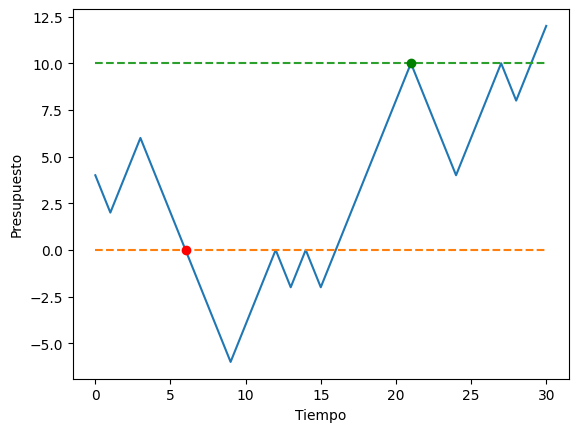

In [ ]:
from random import choice, randint, seed
import matplotlib.pyplot as plt
import numpy as np

seed(68)

times = [0]
values = [4]
disturbance = [2, -2]

for i in range(30):
  times.append(times[-1] + 1)
  values.append(values[-1] + choice(disturbance))

reach_0 = find_reach_simulation(values, 0)
print("El primer tiempo en el que alcanzamos el estado 0 es: ", reach_0)
reach_10 = find_reach_simulation(values, 10)
print("El primer tiempo en el que alcanzamos el estado 10 es: ", reach_10)

plt.plot(times, values)
plt.xlabel("Tiempo")
plt.ylabel("Presupuesto")
plt.plot(np.linspace(0, 30, 30), np.zeros(30), linestyle='dashed')
plt.plot(np.linspace(0, 30, 30), [10 for i in range(30)], linestyle='dashed')

plt.plot(reach_0, 0, marker='o', color='red')
plt.plot(reach_10, 10, marker='o', color='green')

plt.show()


<p align="justify"> Como es de esperarse en general no podremos calcular explícitamente el valor de la variable $T_{y}$ puesto que de lo contrario no sería aleatoria y más bien estaremos interesados en calcular por ejemplo su esperanza. Pero para poder llevar a cabo cualquiera de esos cálculos, es necesario entonces calcular las probabilidades para los valores puntuales de $T_{y}$.

<p align="justify"> Ahora bien, observe tal como lo hacíamos en el cálculo de probabilidades de eventos, nos facilita el trabajo tener un punto de partida para poder comenzar a trazar caminos, lo cual recuerde no representa ningún problema ya que si juntamos las probabilidades para todos los comienzos diferentes obtenemos la probabilidad general. Es por ello que decidimos centrarnos en lugar de calcular $P(T_{y} = t)$, mejor calcular $P(T_{y} = t | X_{0} = x)$, lo cual abreviaremos como $P_{x}(T_{y} = t)$.

<p align="justify"> Para calcular dicha probabilidad nótese para garantizar el estado $y$ se visita por primera vez en el tiempo $t$, al igual que antes sólo tenemos que generar todos los posibles caminos, con la única restricción no se permita transitar a $y$ antes del tiempo $t$. Por ejemplo, para $P_{x}(T_{y} = 3)$ tenemos:

\begin{equation*}
P_{x}(T_{y} = 3) = Σ_{z_{2} \neq y} Σ_{z_{1} \neq y} p(x, z_{1})*p(z_{1}, z_{2})*p(z_{2}, y)
\end{equation*}

<p align="justify"> De esta última expresión es inmediato el darse cuenta si quisiéramos calcular la probabilidad de esta manera, tendríamos que calcular la probabilidad para un número exponencial de eventos disjuntos ya que al igual que antes estaríamos recreando "casi" todas las rutas. Lamentablemente, en este problema no podemos simplemente usar nuestro enfoque de repesar la matriz de transición de la cadena ya que los repesajes toman en cuenta la posible transición por el estado $y$. Lo que estamos entonces buscando, es alguna manera de poder calcular rápidamente, posiblemente por medio de repesajes, una transición que no tome en cuenta a $y$. Para ello, hagamos las siguientes observaciones.

<p align="justify"> La primera observación, es que a partir de la expresión anterior, las probabilidades de tiempo de alcance pueden ser calculadas hasta cierto punto y vistas como un tiempo de alcance a menor distancia con un nuevo punto inicial.

\begin{equation*}
P_{x}(T_{y} = 3) = Σ_{z_{1} \neq y} p(x, z_{1})*P_{z_{1}}(T_{y} = 2)
\end{equation*}

<p align="justify"> Además, como caso especial tenemos el tiempo de alcance de un estado cuando transcurre solamente una unidad de tiempo es meramente la probabilidad de transición entre los estados:

\begin{equation*}
P_{x}(T_{y} = 1) = p(x, y)
\end{equation*}

<p align="justify"> Juntando ambas observaciones es que se nos ocurre particionar el alcanzar un estado $y$ como la probabilidad de moverse en un grafo sin transiciones a $y$ y posteriormente habilitar la transición a $y$ en un único paso.

<p align="justify"> La matriz entonces que proponemos como aquella que nos ayudará a calcular las probabilidades en n-pasos en la misma cadena de Markov pero sin $y$ es la matriz de transición de la cadena con la columna del estado $y$ siendo completamente ceros (Note la fila no debe hacerse ceros ya que si el estado inicial del que partimos es $y$ nos estaríamos condenando a no salir y solamente queremos restringir los estado se muevan a $y$). Note esta nueva matriz ya no necesariamente es estocástica, por lo que por su cuenta no representa una cadena de Markov, sin embargo sí representa una dinámica cerrada en ésta, lo cual es lo que nos importa.

<p align="justify"> Luego si nombramos a ésta matriz $R$, podemos calcular la probabilidad de $P_{x}(T_{y} = t)$ como la suma de todas las transiciones en $t-1$-pasos de $x$ a $z$ en el grafo reducido multiplicadas por la probabilidad de transicionar de $z$ a $y$ en la cadena sin restricción, lo que en notación sería $Σ_{z \neq y} R^{t-1}_{x,z}*p(z,y)$.

<p align="justify"> El desarrollo algebraico se realiza abajo para el caso $P_{x}(T_{y} = 4)$ y puede ser fácilmente generalizado.

\begin{align*}
P_{x}(T_{y} = 4) &= Σ_{z_{3} \neq y} Σ_{z_{2} \neq y} Σ_{z_{1} \neq y} p(x, z_{1})*p(z_{1}, z_{2})*p(z_{2}, z_{3})*p(z_{3}, y)\\
&= Σ_{z_{3} \neq y} P_{z_{3}}(T_{y} = 1) Σ_{z_{2} \neq y} Σ_{z_{1} \neq y} p(x, z_{1})*p(z_{1}, z_{2})*p(z_{2}, z_{3})\\
&=Σ_{z_{3} \neq y}P_{z_{3}}(T_{y} = 1)*R^{3}_{x,z_{3}}\\
&=Σ_{z_{3} \neq y}p(z_{3}, y)*R^{3}_{x,z_{3}}
\end{align*}

<p align="justify"> Como un extra, note que el enfoque de resolver el problema por medio de repesajes nos permite obtener de golpe también los tiempos de alcance para el estado $y$ en $t$ unidades de tiempo para cualquier estado inicial si decidimos repesar el vector de transición al estado $y$ con la matriz $R^{t-1}$.

\begin{equation*}
\begin{bmatrix}
    p(0,0) & p(0,1) & ⋯ & p(0, y-1) & 0 & \cdots & p(0,n) \\
    p(1,0) & p(1,1) & ⋯ & p(1, y-1) & 0 & \cdots & p(1,n)\\
    \vdots & \vdots & & \vdots & \vdots & & \vdots\\
    p(y,0) & p(y,1) & ⋯ & p(y, y-1) & 0 & \cdots & p(y,n)\\
    \vdots & \vdots &  & \vdots & \vdots &  & \vdots\\
    p(n,0) & p(n,1) & ⋯ & p(n, y-1) & 0 & \cdots & p(n,n)
\end{bmatrix}^{t-1}
\begin{bmatrix}
    p(0,y)\\
    p(1,y)\\
    \vdots\\
    p(n,y)
\end{bmatrix}
\end{equation*}

## Código Tiempos de Alcance

<p align="justify"> El siguiente código usa el método que anteriormente describimos, encontrando la matriz reducida y posteriormente haciendo uso de nuestra función para elevar matrices la cual posteriormente se usa para calcular el único valor deseado $P_{x}(T_{y} = t)$, aunque se puede modificar fácilmente a devolver el vector ponderado de dichas probabilidades para todo valor inicial $x$.

In [ ]:
def conditional_prob_reaching_time(initial_state, reach_state, time,
                                   transition_matrix, n_states):

  reduced_matrix = [[0 if j == reach_state
                     else transition_matrix[i][j] for j in range(n_states)]
                     for i in range(n_states)]

  powers = calculate_powers_of_two(reduced_matrix, time - 1)
  reduced_matrix_exp = binary_exponentiation(reduced_matrix, time - 1, powers)

  prob = 0
  for state in range(n_states):
    prob += reduced_matrix_exp[initial_state][state] * transition_matrix[state][reach_state]

  return prob

## Complejidad

<p align="justify"> Dado que nuestro código se basa en nuestra función para elevar matrices, tenemos la complejidad de la función $\textit{conditional_prob_reaching_time}$ es $O(\log_{2}(t-1)*n^{3} + n^{2} + n)$, donde el término al cuadrado es por la creación de la matriz reducida y el termino lineal por el cálculo de la probabilidad. En general esto es $O(\log_{2}(t-1)*n^{3})$.

## Ejemplo 1

<p align="justify"> Tomando nuestra cadena de Markov para la máquina, supóngase queremos encontrar la probabilidad que dado nuestra máquina está descompuesta, vuelva a descomponerse hasta el día 30, es decir $P_{0}(T_{0} = 30)$.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1u-9WnFG3GxJuNak3pKuRoLpNwmuLtQpt"
width = 350/>
<figcaption></figcaption>Cadena Máquina</center>
</figure>

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 2
Da la distribucón inicial:
0.5 0.5
Da la matriz de transicion:
0.6 0.4
0.7 0.3


In [ ]:
initial_state = int(input("Da el estado inicial: "))
reach_state = int(input("Da el estado de alcance: "))
time = int(input("Da el tiempo de alcance: "))
print("La probabilidad es: ",
      conditional_prob_reaching_time(initial_state, reach_state,
                                     time, transition_matrix, n_states))

Da el estado inicial: 0
Da el estado de alcance: 0
Da el tiempo de alcance: 30
La probabilidad es:  6.405501887389076e-16


<p align="justify"> En este caso, para aquellos escépticos, podemos confirmar el resultado de forma teórica ya que la cantidad tan pequeña de estados facilita la obtención de una fórmula cerrada.

<p align="justify"> A continuación mostramos la probabilidad para unos cuantos valores de $t$, a partir de los cuales la obtención de la fórmula general es inmediata.

\begin{align*}
P_{0}(T_{0} = 1) &= p(0,0)\\
P_{0}(T_{0} = 2) &= p(0,1)*p(1,0)\\
P_{0}(T_{0} = 3) &= p(0,1)*p(1,1)*p(1,0)\\
P_{0}(T_{0} = 4) &= p(0,1)*p(1,1)*p(1,1)*p(1,0)\\
&= p(0,1)*p(1,1)^{2}*p(1,0)
\end{align*}

<p align="justify"> En general entonces tenemos:

\begin{align*}
P_{0}(T_{0} = t) &= p(0,1)*p(1,1)^{t-2}*p(1,0) \text{, si } t ≥ 2\\
P_{0}(T_{0} = 1) &= p(0,0)
\end{align*}

<p align="justify"> Por lo tanto $P_{0}(T_{0} = 30) = p(0,1)*p(1,1)^{28}*p(1,0) = 0.4 * (0.3)^{28} * 0.7$, lo cual es igual al resultado que obtuvimos.


## Ejemplo 2

<p align="justify"> Supóngase se tiene un inventario inicialmente lleno, que puede contener 0,1 o 2 productos y que tiene como matriz de transición:

\begin{equation*}
\begin{bmatrix}
    0.1 & 0.4 & 0.5\\
    0.5 & 0.5 & 0\\
    0.1 & 0.4 & 0.5
\end{bmatrix}
\end{equation*}

<p align="justify"> Calcular la probabilidad el inventario se vacíe en 4 días, es decir, $P_{2}(T_{0} = 4)$.

In [ ]:
n_states, states, initial_dist, transition_matrix = initialize_chain()

Da la cantidad de estados: 3
Da la distribucón inicial:
0 0 1
Da la matriz de transicion:
0.1 0.4 0.5
0.5 0.5 0
0.1 0.4 0.5


In [ ]:
initial_state = int(input("Da el estado inicial: "))
reach_state = int(input("Da el estado de alcance: "))
time = int(input("Da el tiempo de alcance: "))
print("La probabilidad es: ",
      conditional_prob_reaching_time(initial_state, reach_state,
                                     time, transition_matrix, n_states))

Da el estado inicial: 2
Da el estado de alcance: 0
Da el tiempo de alcance: 4
La probabilidad es:  0.16250000000000003


## Otra Observación

Antes de continuar, hay algo importante que vale la pena resaltar. Note que a partir del ejemplo anterior.